In [1]:
# ライブラリのインポート
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import MeCab

In [2]:
def mecab_analysis(text):
    t = MeCab.Tagger('-Ochasen -b /usr/local/lib/mecab/dic/mecab-ipadic-neologd/')

    output = []
    for result in t.parse(text).split("\n"):
        if result == "EOS":
            break

        elements = result.split("\t")
        word = elements[0]
        word_type = elements[3]
        if "-" in word_type:
            word_type = word_type.split("-")[0]            

        if word_type in ["形容詞", "動詞","名詞", "副詞"]:
            output.append(word)

    return output

# https://www.trifields.jp/how-to-use-mecab-in-ubuntu-14-04-and-python-3-1196
# MeCabのバージョン0.996で、この方法によりPython3からMeCabのparseToNode関数を使うと、最初のsurface（表層形）が表示されない
#
# parseToNode で特定品詞のみ抽出しようとしたが
# surface では単語ではなく単語以降の全文を取ってきてしまう
# バグ？
#
#    # コメントのバグ回避
#    t.parse("")
#
#    node = t.parseToNode(text)
#    output = []
#    while node:
#        print("feature "+node.feature)
#        print("surface "+ node.surface)
#        if node.surface != "":  # ヘッダとフッタを除外
#            word_type = node.feature.split(",")[0]
#            if word_type in ["形容詞", "動詞","名詞", "副詞"]:
#                output.append(node.surface)
#
#        node = node.next
#        if node is None:
#            break
#
#    return output

In [3]:
def create_wordcloud(text):
    fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"
    
    # ストップワードの設定
    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'']

    wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, \
                          stopwords=set(stop_words)).generate(text)

    plt.figure(figsize=(15,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

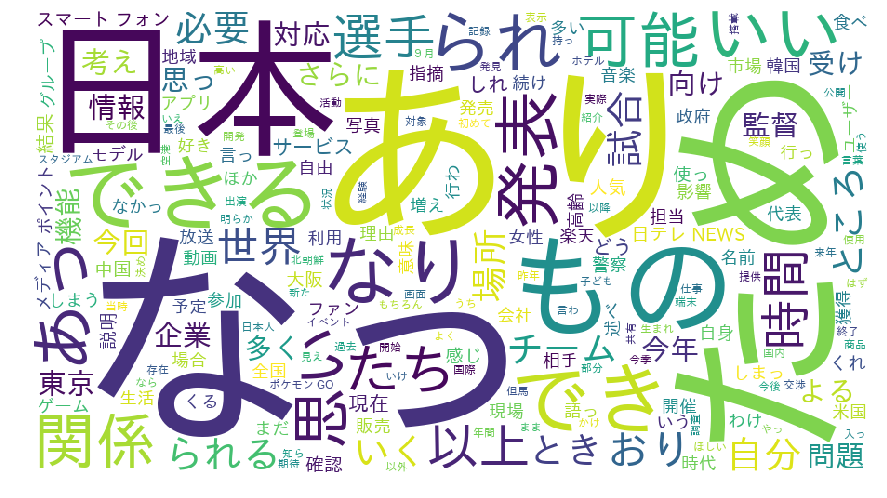

In [4]:
import os

words = []

files = os.listdir('news')
for file in files:
    with open("news/" + file) as f:
        for line in f.read().split("。"):
            words.extend(mecab_analysis(line))

create_wordcloud(" ".join(words))